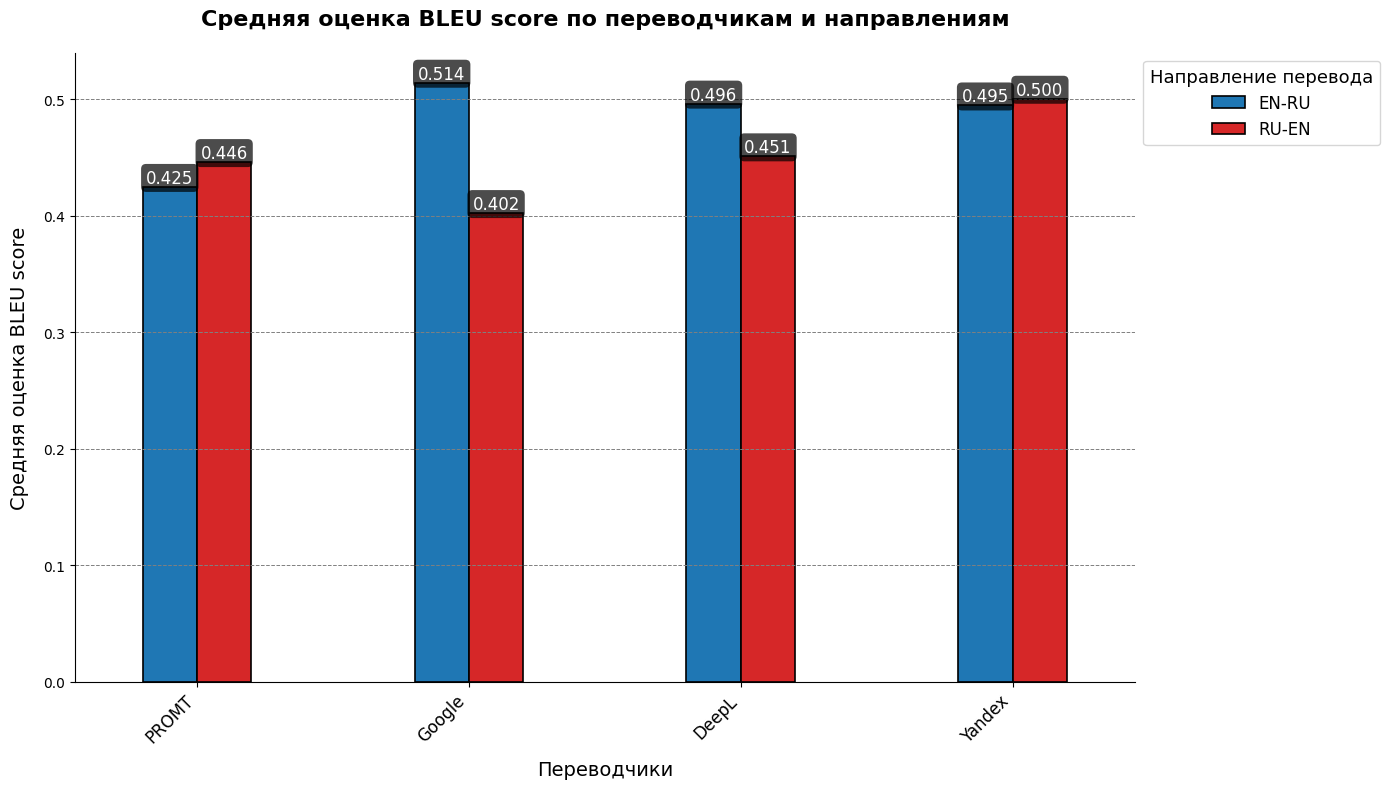


Средняя оценка BLEU score по переводчикам и направлениям:

PROMT: EN-RU = 0.425, RU-EN = 0.446
Google: EN-RU = 0.514, RU-EN = 0.402
DeepL: EN-RU = 0.496, RU-EN = 0.451
Yandex: EN-RU = 0.495, RU-EN = 0.500


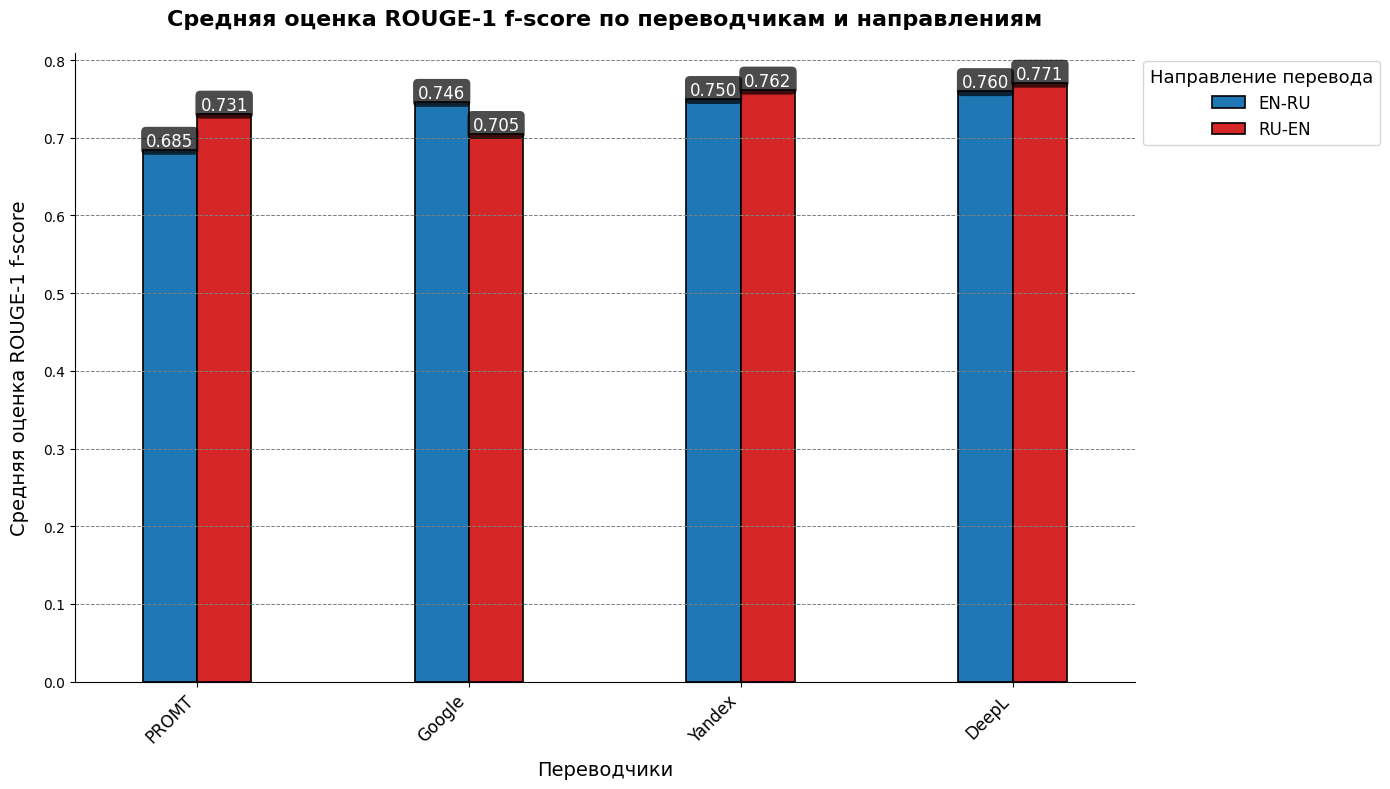


Средняя оценка ROUGE-1 f-score по переводчикам и направлениям:

PROMT: EN-RU = 0.685, RU-EN = 0.731
Google: EN-RU = 0.746, RU-EN = 0.705
Yandex: EN-RU = 0.750, RU-EN = 0.762
DeepL: EN-RU = 0.760, RU-EN = 0.771


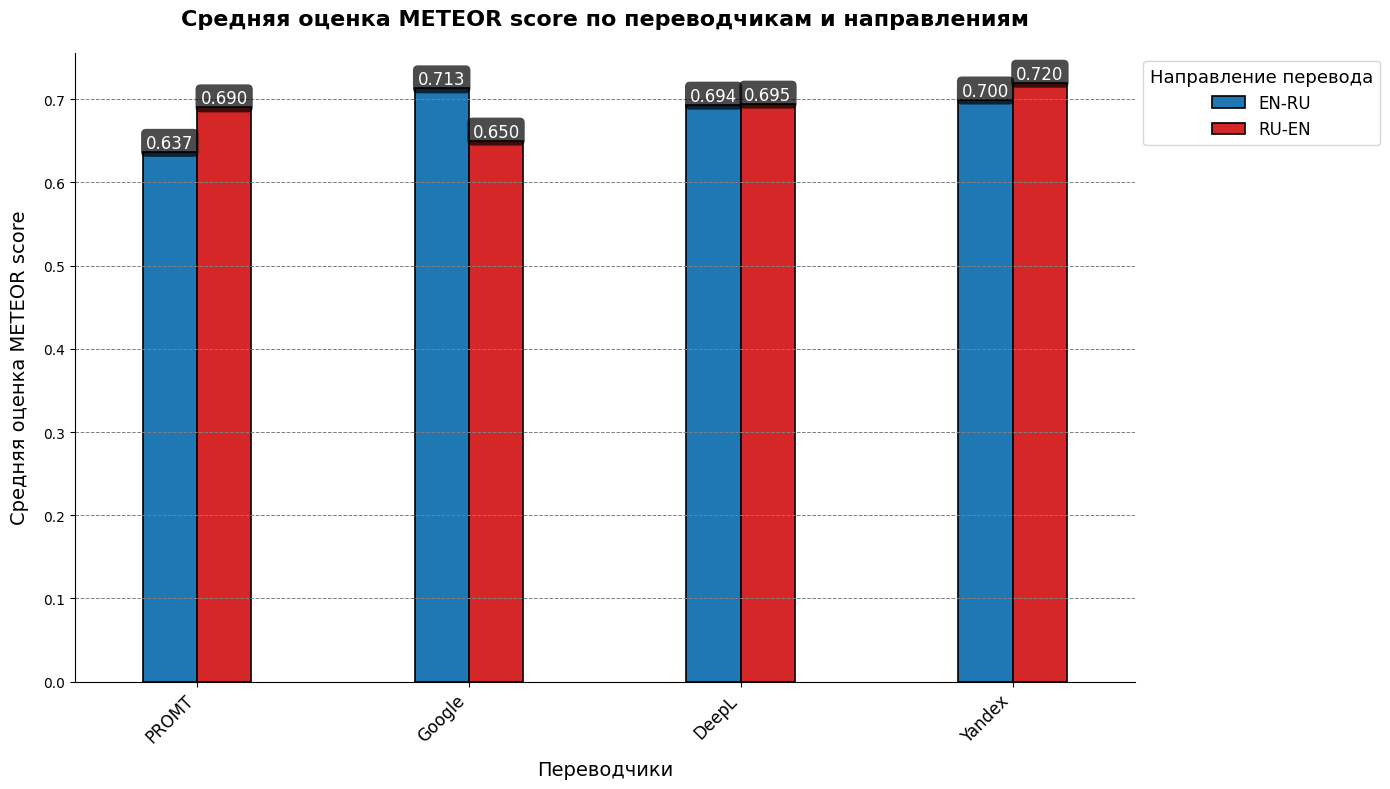


Средняя оценка METEOR score по переводчикам и направлениям:

PROMT: EN-RU = 0.637, RU-EN = 0.690
Google: EN-RU = 0.713, RU-EN = 0.650
DeepL: EN-RU = 0.694, RU-EN = 0.695
Yandex: EN-RU = 0.700, RU-EN = 0.720


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json

# Загрузка данных из CSV
df = pd.read_csv("data.csv")

# Преобразуем строку с оценками ROUGE в словарь и извлекаем ROUGE-1 f-score
df['ROUGE-1 f-score'] = df['ROUGE scores'].apply(lambda x: json.loads(x.replace("'", "\""))[0]['rouge-1']['f'])

# Группируем по переводчикам и направлениям перевода, вычисляя средние оценки для каждой метрики
metrics = ['BLEU score', 'ROUGE-1 f-score', 'METEOR score']
for metric in metrics:
    translator_scores = df.groupby(['Переводчик', 'Направление перевода'])[metric].mean().unstack()

    # Рассчитаем среднее по двум направлениям и отсортируем переводчиков по возрастанию
    translator_scores['Среднее'] = translator_scores.mean(axis=1)
    translator_scores = translator_scores.sort_values(by='Среднее').drop(columns=['Среднее'])

    # Построение комбинированной столбчатой диаграммы для каждой метрики
    fig, ax = plt.subplots(figsize=(14, 8))
    colors = ['#1f77b4', '#d62728']  # Синий и красный
    bar_width = 0.4  # Увеличиваем ширину столбцов
    bars = translator_scores.plot(kind='bar', ax=ax, color=colors, width=bar_width, edgecolor='black', linewidth=1.2)

    # Добавим значения над каждым столбцом с обводкой для улучшенной видимости
    for bar in bars.patches:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2.0, height, f"{height:.3f}", ha='center', va='bottom', fontsize=12, color='white',
                bbox=dict(facecolor='black', alpha=0.7, edgecolor='none', boxstyle='round,pad=0.3'))

    # Настройка графика
    ax.set_xlabel('Переводчики', fontsize=14, labelpad=10)
    ax.set_ylabel(f'Средняя оценка {metric}', fontsize=14, labelpad=10)
    ax.set_title(f'Средняя оценка {metric} по переводчикам и направлениям', fontsize=16, fontweight='bold', pad=20)
    ax.set_xticklabels(translator_scores.index, rotation=45, ha='right', fontsize=12)
    ax.legend(title="Направление перевода", loc='upper left', bbox_to_anchor=(1, 1), fontsize=12, title_fontsize='13')

    # Убираем верхнюю и правую границы графика
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Добавляем сетку по оси y
    ax.yaxis.grid(True, linestyle='--', linewidth=0.7, color='gray')
    ax.xaxis.grid(False)

    plt.tight_layout()
    plt.show()

    # Вывод текстовых данных под графиком
    print(f"\nСредняя оценка {metric} по переводчикам и направлениям:\n")
    for translator in translator_scores.index:
        scores = translator_scores.loc[translator]
        print(f"{translator}: EN-RU = {scores['EN-RU']:.3f}, RU-EN = {scores['RU-EN']:.3f}")
